<a href="https://colab.research.google.com/github/AArashev/Enhancing-Stock-Market-Predictions-with-LSTM-Neural-Networks/blob/main/Artificial_Recurrent_Neural_Network_called_Long_Short_Term_Memory_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


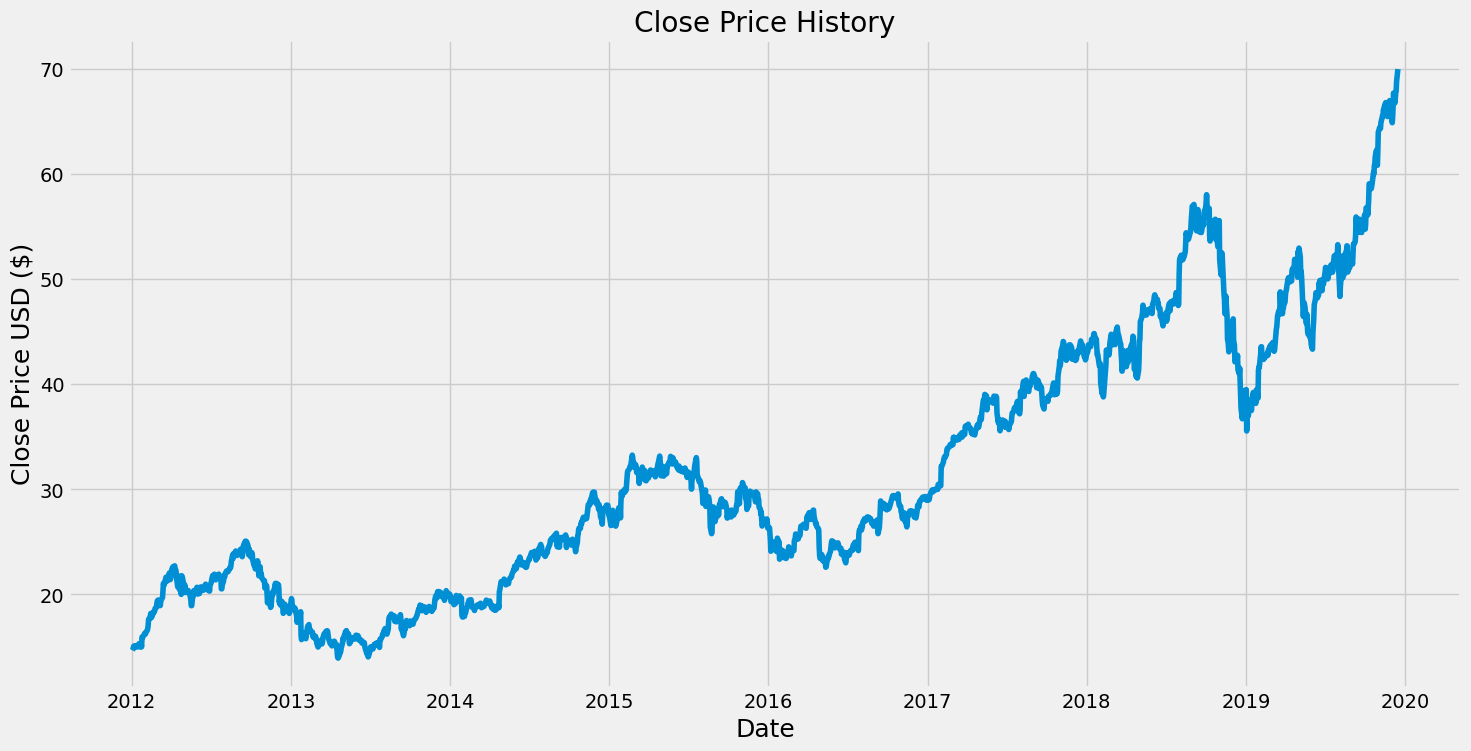

In [2]:
#Atajan Arashev
# Description: Artificial Recurrent Neural Network called Long Short Term Memory (LSTM)
# to predict the closing stock price of Apple Inc. using the past 60 day stock price.

# Import the libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Download the stock data
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


Epoch 1/100
49/49 [==============================] - 7s 48ms/step - loss: 0.0073
Epoch 2/100
49/49 [==============================] - 3s 54ms/step - loss: 0.0011
Epoch 3/100
49/49 [==============================] - 3s 62ms/step - loss: 8.9163e-04
Epoch 4/100
49/49 [==============================] - 2s 48ms/step - loss: 7.8085e-04
Epoch 5/100
49/49 [==============================] - 2s 46ms/step - loss: 7.7135e-04
Epoch 6/100
49/49 [==============================] - 2s 47ms/step - loss: 6.6938e-04
Epoch 7/100
49/49 [==============================] - 3s 54ms/step - loss: 6.6718e-04
Epoch 8/100
49/49 [==============================] - 3s 62ms/step - loss: 5.6696e-04
Epoch 9/100
49/49 [==============================] - 2s 46ms/step - loss: 5.5586e-04
Epoch 10/100
49/49 [==============================] - 2s 46ms/step - loss: 5.6067e-04
Epoch 11/100
49/49 [==============================] - 2s 47ms/step - loss: 4.9549e-04
Epoch 12/100
49/49 [==============================] - 3s 53ms/step - lo

<ipython-input-3-7cedca8b86d0>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


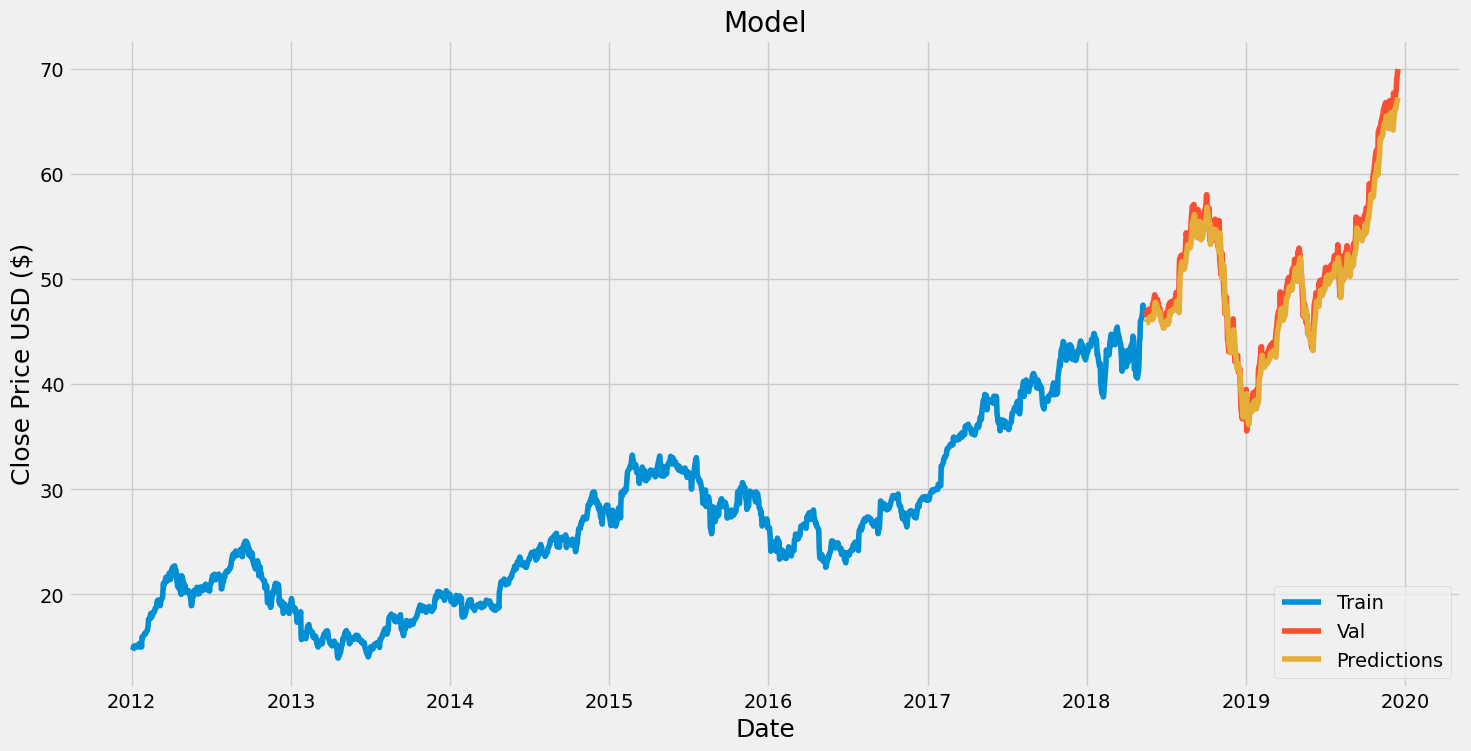

In [3]:

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (80% of the dataset)
train_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
train_data = scaled_data[0:train_data_len, :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data to be 3-dimensional (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

# Create the testing data set
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array and reshape it for the LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

# Visualize the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [18]:


# In practice, this should be the last trading day of 2023
start_date = datetime.datetime(2023, 12, 31)

# Calculate the number of trading days approximately for two months
# Generally, there are about 20 trading days in a month
num_days_to_predict = 20 * 2

# Prepare the last 60 days of data to be used for predictions
# Make sure this data is the most recent data leading up to start_date
last_60_days = recent_df.filter(['Close']).tail(60).values
last_60_days_scaled = scaler.transform(last_60_days)

# Make predictions for the next two months
predicted_prices = []
for _ in range(num_days_to_predict):
    # Reshape the data for the LSTM model
    X_last_60_days = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], 1))

    # Predict the next day price
    predicted_scaled_price = model.predict(X_last_60_days)
    predicted_price = scaler.inverse_transform(predicted_scaled_price)
    predicted_prices.append(predicted_price[0,0])

    # Append the predicted price to the last 60 days and drop the oldest price
    last_60_days_scaled = np.append(last_60_days_scaled, predicted_scaled_price)
    last_60_days_scaled = last_60_days_scaled[1:].reshape(-1, 1)

# Output the predicted prices for the first two months
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: ${price:.2f}")


1/1 [==============================] - 0s 25ms/step
Day 1: $138.76
Day 2: $138.22
Day 3: $137.38
Day 4: $136.36
Day 5: $135.22
Day 6: $134.00
Day 7: $132.76
Day 8: $131.50
Day 9: $130.25
Day 10: $129.03
Day 11: $127.85
Day 12: $126.71
Day 13: $125.62
Day 14: $124.58
Day 15: $123.59
Day 16: $122.65
Day 17: $121.75
Day 18: $120.90
Day 19: $120.09
Day 20: $119.32
Day 21: $118.59
Day 22: $117.89
Day 23: $117.23
Day 24: $116.60
Day 25: $116.00
Day 26: $115.42
Day 27: $114.88
Day 28: $114.35
Day 29: $113.85
Day 30: $113.38
Day 31: $112.92
Day 32: $112.48
Day 33: $112.06
Day 34: $111.66
Day 35: $111.27
Day 36: $110.90
Day 37: $110.55
Day 38: $110.21
Day 39: $109.88
Day 40: $109.57


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Display the metrics
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape, '%')

Root Mean Squared Error: 1.2819476740201412
Mean Absolute Error: 1.0732230949401855
Mean Absolute Percentage Error: 2.1213006176101947 %


In [20]:

# Description: Artificial Recurrent Neural Network called Long Short Term Memory (LSTM)
# to predict the closing stock price of Apple Inc. using the past 60 day stock price.

# Import the libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Function to create the LSTM dataset
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Function to build the LSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Download the stock data
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Scale the data
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform time series cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(scaled_data), start=1):
    # Split the data into training and test sets
    train, test = scaled_data[train_index], scaled_data[test_index]

    # Get the train and test sets for the model
    x_train, y_train = create_dataset(train)
    x_test, y_test = create_dataset(test)

    # Reshape data for the LSTM layer
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Build and compile the LSTM model for the current fold
    model = build_model(input_shape=(x_train.shape[1], 1))

    # Train the model
    model.fit(x_train, y_train, epochs=1, batch_size=32)  # You can adjust these hyperparameters

    # Predict
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform to get actual values

    # Calculate evaluation metrics for the current fold
    fold_rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    fold_mae = mean_absolute_error(y_test_actual, predictions)
    fold_mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

    # Display the evaluation metrics for the current fold
    print(f'Fold {fold} - Root Mean Squared Error (RMSE): {fold_rmse:.4f}')
    print(f'Fold {fold} - Mean Absolute Error (MAE): {fold_mae:.4f}')
    print(f'Fold {fold} - Mean Absolute Percentage Error (MAPE): {fold_mape:.4f}%')


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 2s 46ms/step
Fold 1 - Root Mean Squared Error (RMSE): 1.6806
Fold 1 - Mean Absolute Error (MAE): 1.2130
Fold 1 - Mean Absolute Percentage Error (MAPE): 5.5549%
9/9 [==============================] - 5s 17ms/step
Fold 2 - Root Mean Squared Error (RMSE): 5.9876
Fold 2 - Mean Absolute Error (MAE): 5.8410
Fold 2 - Mean Absolute Percentage Error (MAPE): 19.3501%
9/9 [==============================] - 1s 16ms/step
Fold 3 - Root Mean Squared Error (RMSE): 1.1499
Fold 3 - Mean Absolute Error (MAE): 0.8878
Fold 3 - Mean Absolute Percentage Error (MAPE): 3.1995%
9/9 [==============================] - 1s 15ms/step
Fold 4 - Root Mean Squared Error (RMSE): 1.8865
Fold 4 - Mean Absolute Error (MAE): 1.5306
Fold 4 - Mean Absolute Percentage Error (MAPE): 3.4658%
9/9 [==============================] - 1s 16ms/step
Fold 5 - Root Mean Squared Error (RMSE): 2.4279
Fold 5 - Mean Absolute Error (MAE): 2.1146
Fold 5 - Mean Absolute Percentage Error (MAPE): 4.2317%
